In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/our-world-in-data-covid19-dataset/owid-covid-data.csv


# Exploratory Data Analysis Of Owid Covid 19 Data
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Data Science Course

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.options.display.max_rows = 1000
import warnings
warnings.filterwarnings("ignore")

In [3]:
covid = pd.read_csv('/kaggle/input/our-world-in-data-covid19-dataset/owid-covid-data.csv')
covid.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511  41128772.0   
1            64.83                    0.511  41128772.0   
2            64.83                    0.511  41128772.0   
3            64.83                    0.511  41128772.0   
4            64.83                    0.511  41128772.0   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [4]:
covid.shape

(350085, 67)

In [5]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    350085 non-null  object 
 1   continent                                   333420 non-null  object 
 2   location                                    350085 non-null  object 
 3   date                                        350085 non-null  object 
 4   total_cases                                 312088 non-null  float64
 5   new_cases                                   340457 non-null  float64
 6   new_cases_smoothed                          339198 non-null  float64
 7   total_deaths                                290501 non-null  float64
 8   new_deaths                                  340511 non-null  float64
 9   new_deaths_smoothed                         339281 non-null  float64
 

In [7]:
covid.isna().sum()

iso_code                                           0
continent                                      16665
location                                           0
date                                               0
total_cases                                    37997
new_cases                                       9628
new_cases_smoothed                             10887
total_deaths                                   59584
new_deaths                                      9574
new_deaths_smoothed                            10804
total_cases_per_million                        37997
new_cases_per_million                           9628
new_cases_smoothed_per_million                 10887
total_deaths_per_million                       59584
new_deaths_per_million                          9574
new_deaths_smoothed_per_million                10804
reproduction_rate                             165268
icu_patients                                  312470
icu_patients_per_million                      

In [8]:
for col in covid.columns:
    if ((covid[col].isna().sum() / covid.shape[0]) >= 0.8):
        print(f'{col} dropped')
        covid.drop(col, inplace=True, axis=1)
        
covid.info()

icu_patients dropped
icu_patients_per_million dropped
hosp_patients dropped
hosp_patients_per_million dropped
weekly_icu_admissions dropped
weekly_icu_admissions_per_million dropped
weekly_hosp_admissions dropped
weekly_hosp_admissions_per_million dropped
total_boosters dropped
new_vaccinations dropped
total_boosters_per_hundred dropped
excess_mortality_cumulative_absolute dropped
excess_mortality_cumulative dropped
excess_mortality dropped
excess_mortality_cumulative_per_million dropped
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 52 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    350085 non-null  object 
 1   continent                                   333420 non-null  object 
 2   location                                    350085 non-null  object 
 3   date                 

In [9]:
covid.describe().T

count          mean  \
total_cases                                 312088.0  6.683354e+06   
new_cases                                   340457.0  9.601634e+03   
new_cases_smoothed                          339198.0  9.637066e+03   
total_deaths                                290501.0  8.602180e+04   
new_deaths                                  340511.0  8.551106e+01   
new_deaths_smoothed                         339281.0  8.581707e+01   
total_cases_per_million                     312088.0  1.017499e+05   
new_cases_per_million                       340457.0  1.451638e+02   
new_cases_smoothed_per_million              339198.0  1.456969e+02   
total_deaths_per_million                    290501.0  8.722894e+02   
new_deaths_per_million                      340511.0  9.075554e-01   
new_deaths_smoothed_per_million             339281.0  9.107557e-01   
reproduction_rate                           184817.0  9.114954e-01   
total_tests                                  79387.0  2.110457e+07   
new_tests                                    75403.0  6.728541e+04   
total_tests_per_thousand                     79387.0  9.242548e+02   
new_tests_per_thousand                       75403.0  3.272466e+00   
new_tests_smoothed                          103965.0  1.421784e+05   
new_tests_smoothed_per_thousand             103965.0  2.826309e+00   
positive_rate                                95927.0  9.816251e-02   
tests_per_case                               94348.0  2.403633e+03   
total_vaccinations                           79308.0  4.459472e+08   
people_vaccinated                            75911.0  1.980467e+08   
people_fully_vaccinated                      72575.0  1.804808e+08   
new_vaccinations_smoothed                   180718.0  3.049771e+05   
total_vaccinations_per_hundred               79308.0  1.184717e+02   
people_vaccinated_per_hundred                75911.0  5.200447e+01   
people_fully_vaccinated_per_hundred          72575.0  4.705495e+01   
new_vaccinations_smoothed_per_million       180718.0  1.982464e+03   
new_people_vaccinated_smoothed              180489.0  1.128634e+05   
new_people_vaccinated_smoothed_per_hundred  180489.0  7.994983e-02   
stringency_index                            197651.0  4.271402e+01   
population_density                          297178.0  4.033185e+02   
median_age                                  276367.0  3.050603e+01   
aged_65_older                               266708.0  8.699806e+00   
aged_70_older                               273597.0  5.499476e+00   
gdp_per_capita                              270863.0  1.897866e+04   
extreme_poverty                             174561.0  1.384556e+01   
cardiovasc_death_rate                       271487.0  2.642791e+02   
diabetes_prevalence                         285303.0  8.560801e+00   
female_smokers                              203659.0  1.079232e+01   
male_smokers                                200889.0  3.290948e+01   
handwashing_facilities                      132973.0  5.078996e+01   
hospital_beds_per_thousand                  239669.0  3.097245e+00   
life_expectancy                             322072.0  7.371363e+01   
human_development_index                     263138.0  7.224635e-01   
population                                  350085.0  1.284633e+08   

                                                     std      min  \
total_cases                                 4.068903e+07    1.000   
new_cases                                   1.102769e+05    0.000   
new_cases_smoothed                          9.447784e+04    0.000   
total_deaths                                4.398873e+05    1.000   
new_deaths                                  6.136880e+02    0.000   
new_deaths_smoothed                         5.591300e+02    0.000   
total_cases_per_million                     1.512657e+05    0.000   
new_cases_per_million                       1.163715e+03    0.000   
new_cases_smoothed_per_million              5.999578e+02    0.000

In [10]:
covid['smokers'] = covid['male_smokers'] + covid['female_smokers']

In [11]:
numerical_data = ['new_cases', 'new_deaths', 'new_tests']

In [12]:
def percentile_trimming_outlier(data):
    drop_outliers = np.array([])
    for col in numerical_data:
        upper_bound = data[col].quantile(0.98)
        lower_bound = data[col].quantile(0)

        df = data[col]
        indices = df[(df < lower_bound) | (df > upper_bound)].index
        drop_outliers = np.append(drop_outliers, indices)
    return drop_outliers

In [13]:
# Delete Outlier with percetile method
trim_covid = covid.copy()
drop = percentile_trimming_outlier(trim_covid)
dropped = np.unique(drop)
trim_covid.drop(dropped, inplace=True)
trim_covid.shape

(340208, 53)

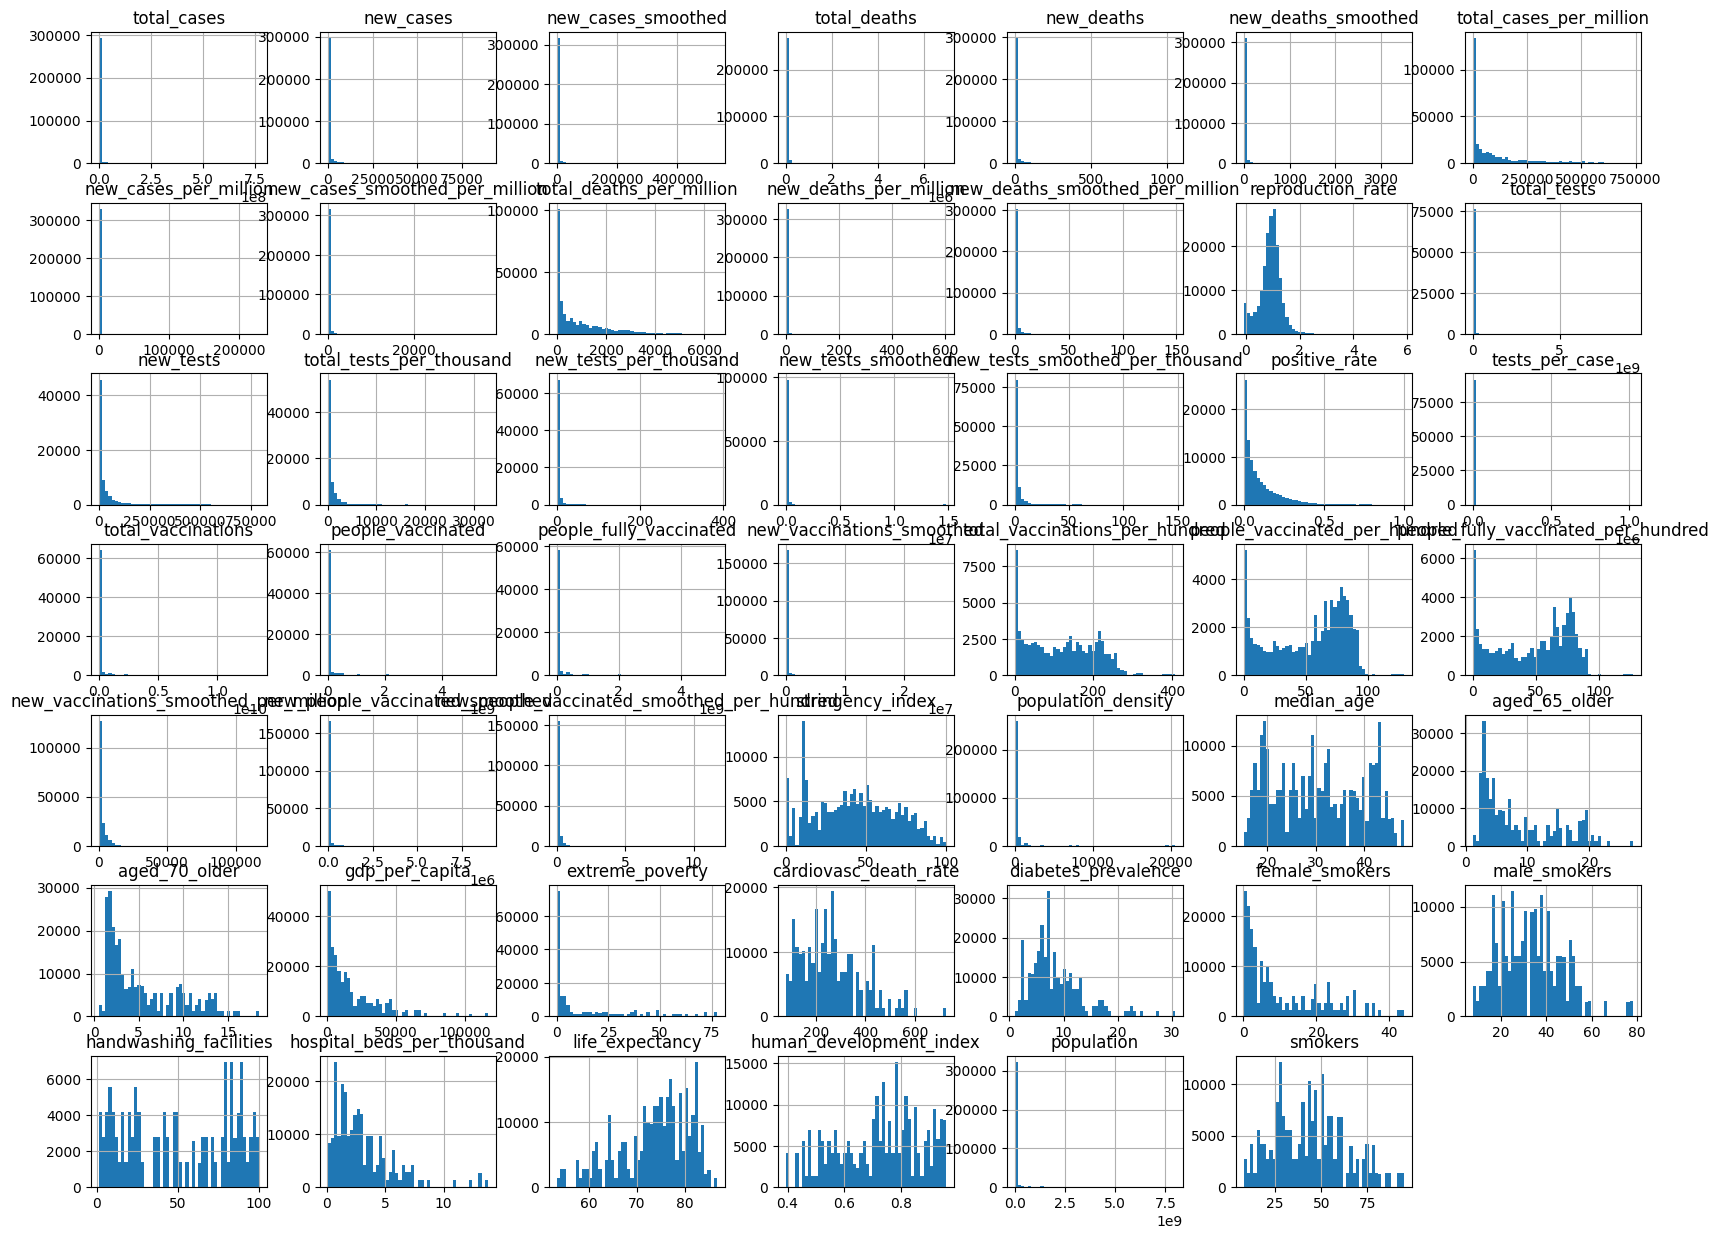

In [14]:
trim_covid.hist(figsize=(20, 15), bins=50)
plt.show()

In [15]:
corr_matrix = trim_covid.drop(['iso_code', 'continent', 'location', 'date', 'tests_units'], axis=1).corr()
pd.set_option('display.max_columns', None)
corr_matrix

total_cases  new_cases  \
total_cases                                    1.000000   0.323629   
new_cases                                      0.323629   1.000000   
new_cases_smoothed                             0.410863   0.711325   
total_deaths                                   0.948907   0.380221   
new_deaths                                     0.172380   0.640196   
new_deaths_smoothed                            0.257331   0.589049   
total_cases_per_million                        0.088815   0.042614   
new_cases_per_million                         -0.010515   0.108586   
new_cases_smoothed_per_million                -0.012632   0.114308   
total_deaths_per_million                       0.109480   0.104545   
new_deaths_per_million                        -0.015644   0.106085   
new_deaths_smoothed_per_million               -0.022244   0.103786   
reproduction_rate                              0.029350   0.106700   
total_tests                                    0.730755   0.267082   
new_tests                                      0.500412   0.463803   
total_tests_per_thousand                       0.113530   0.103198   
new_tests_per_thousand                         0.005157   0.074971   
new_tests_smoothed                             0.022523   0.025506   
new_tests_smoothed_per_thousand                0.009244   0.093102   
positive_rate                                  0.076626   0.257595   
tests_per_case                                -0.019077  -0.023172   
total_vaccinations                             0.832228   0.280960   
people_vaccinated                              0.828345   0.263492   
people_fully_vaccinated                        0.831431   0.257336   
new_vaccinations_smoothed                      0.096477   0.246324   
total_vaccinations_per_hundred                 0.199615   0.151362   
people_vaccinated_per_hundred                  0.185212   0.136653   
people_fully_vaccinated_per_hundred            0.184623   0.125805   
new_vaccinations_smoothed_per_million         -0.065354   0.040909   
new_people_vaccinated_smoothed                 0.080966   0.236318   
new_people_vaccinated_smoothed_per_hundred    -0.056523  -0.002299   
stringency_index                              -0.144950   0.065255   
population_density                            -0.011393  -0.014961   
median_age                                     0.062850   0.174455   
aged_65_older                                  0.062930   0.173852   
aged_70_older                                  0.061798   0.170900   
gdp_per_capita                                 0.036015   0.103170   
extreme_poverty                               -0.045187  -0.142505   
cardiovasc_death_rate                         -0.050109  -0.123719   
diabetes_prevalence                           -0.006328  -0.040047   
female_smokers                                 0.022484   0.075483   
male_smokers                                   0.003103   0.017936   
handwashing_facilities                         0.025032   0.126261   
hospital_beds_per_thousand                     0.035380   0.107778   
life_expectancy                                0.037837   0.122711   
human_development_index                        0.062382   0.173565   
population                                     0.639836   0.314584   
smokers                                        0.014481   0.055375   

                                            new_cases_smoothed  total_deaths  \
total_cases                                           0.410863      0.948907   
new_cases                                             0.711325      0.380221   
new_cases_smoothed                                    1.000000      0.437216   
total_deaths                                          0.437216      1.000000   
new_deaths                                            0.459824      0.252058   
new_deaths_smoothed                                   0.596751      0.337471   
total_cases_per_million                              

<Axes: >

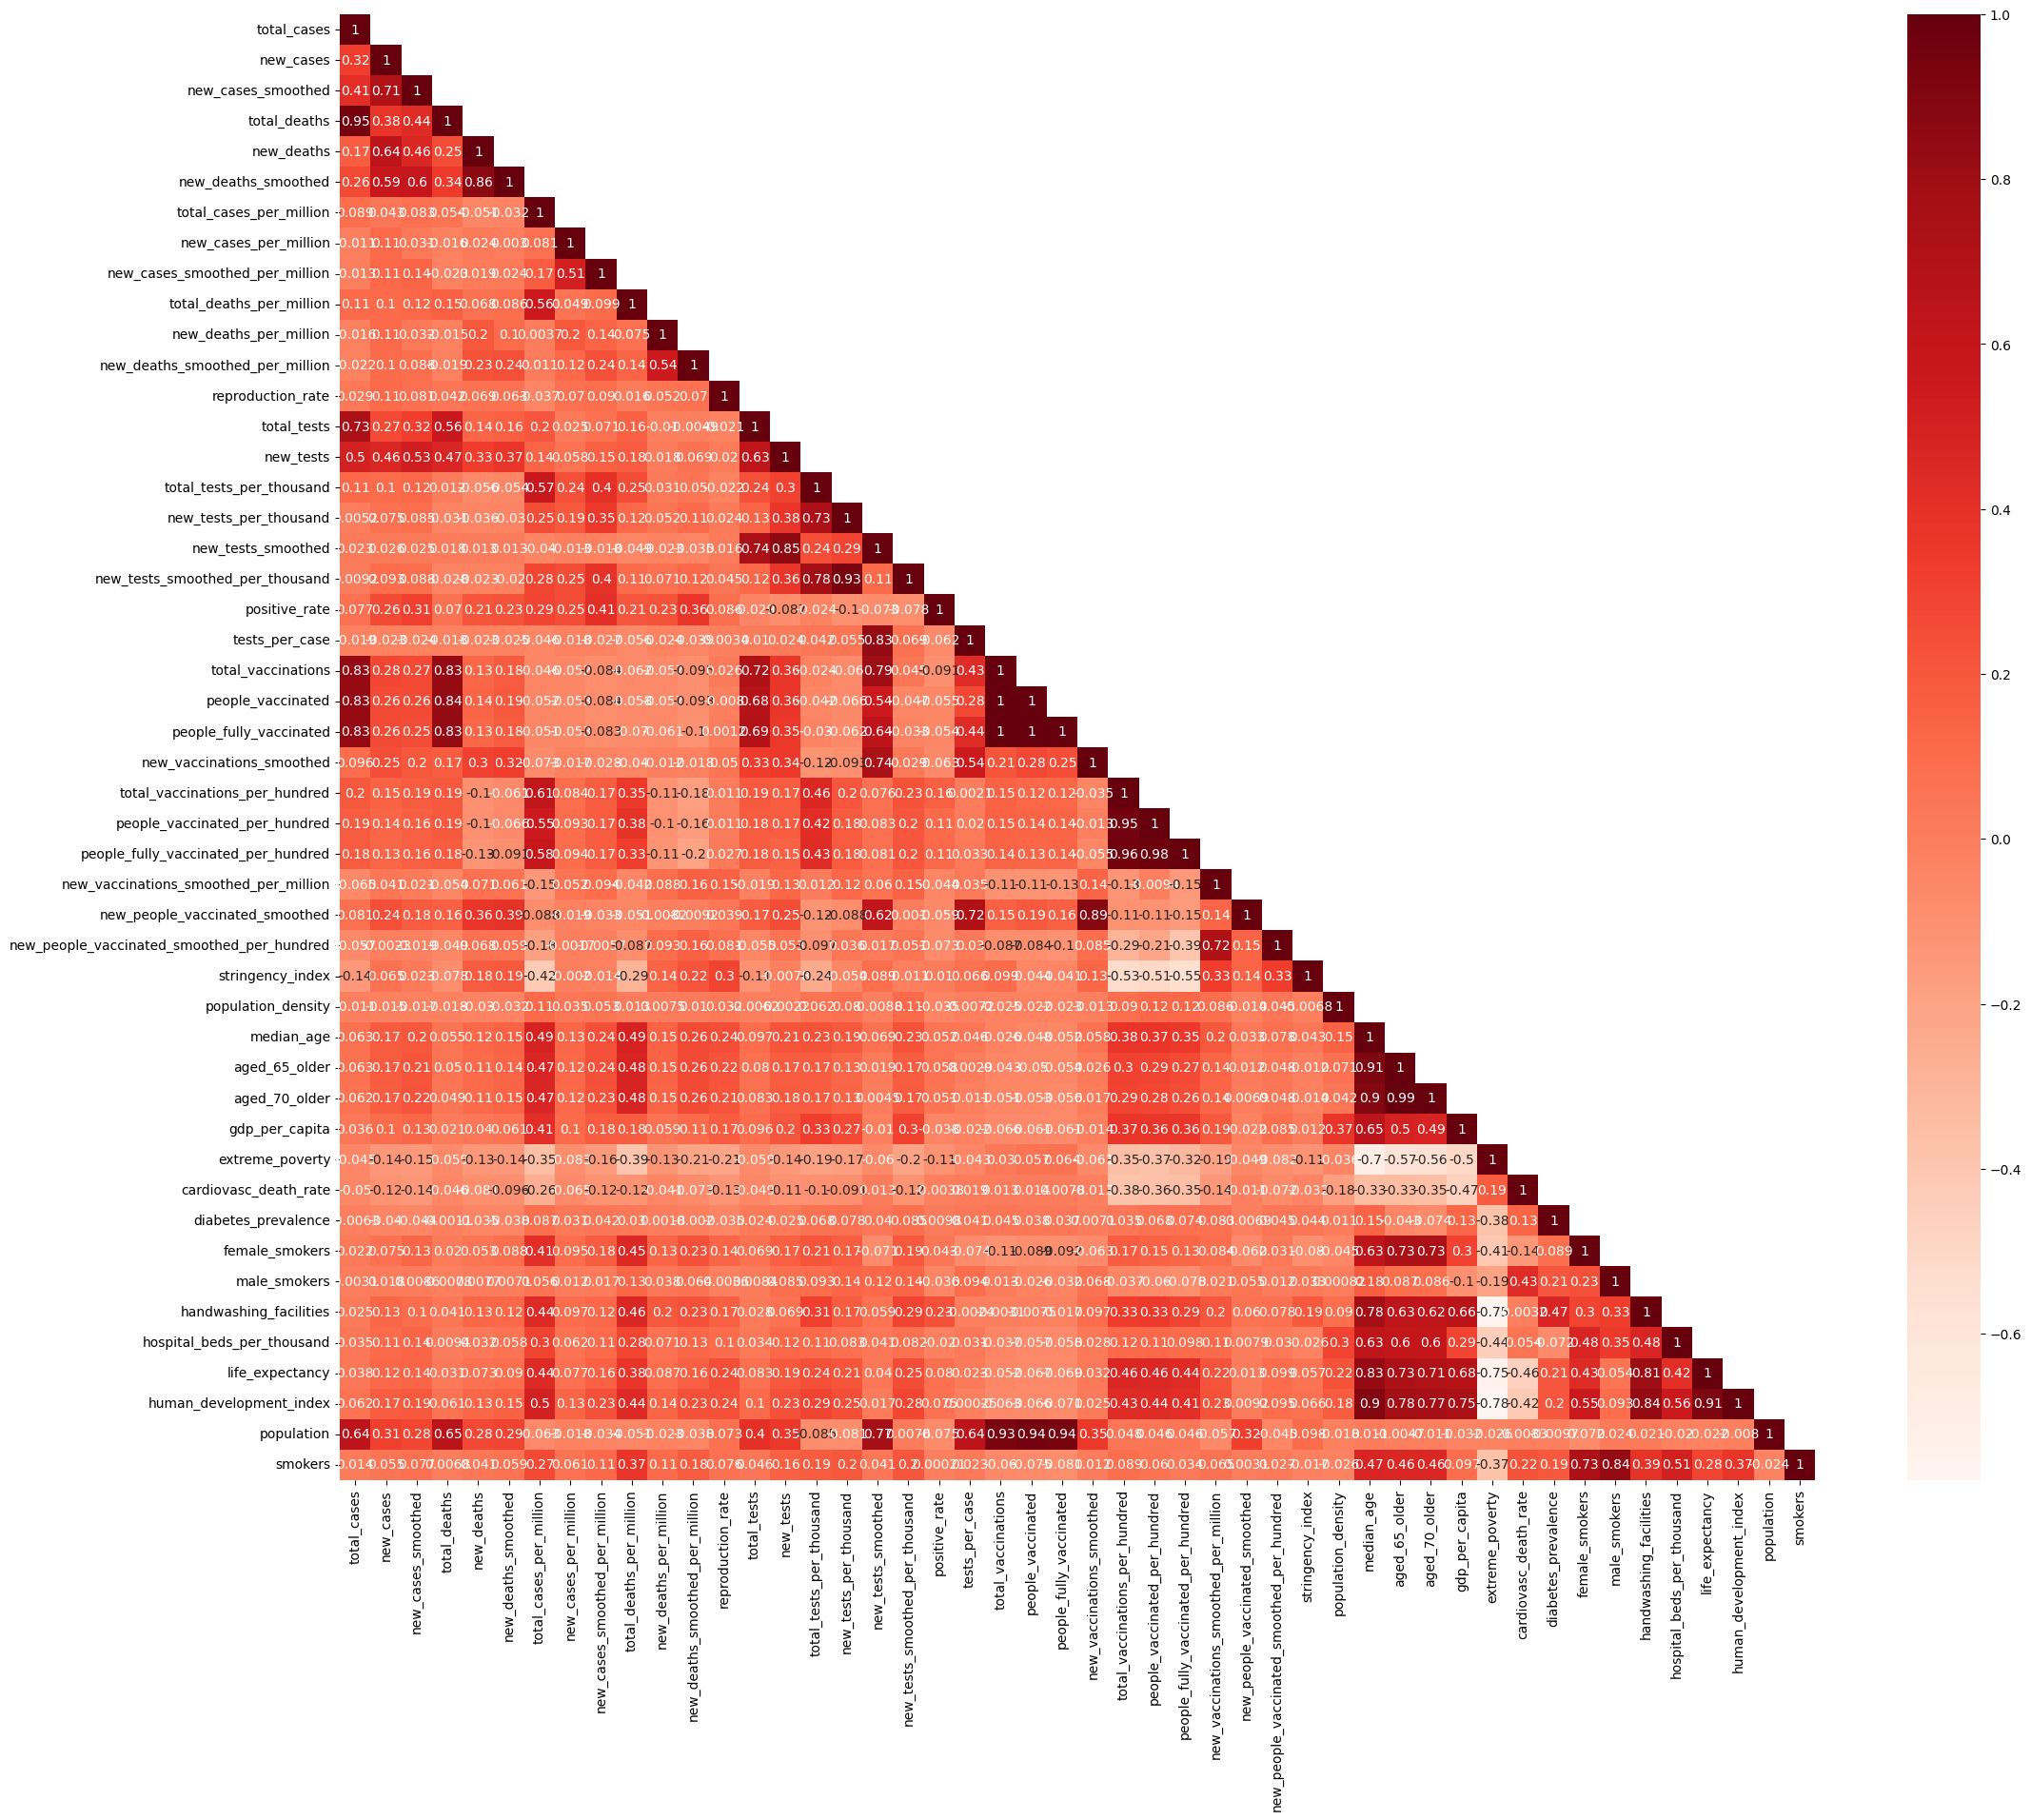

In [16]:
plt.figure(figsize=(25, 20))
corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(bool))
sns.heatmap(corr_matrix, annot=True, cmap='Reds')

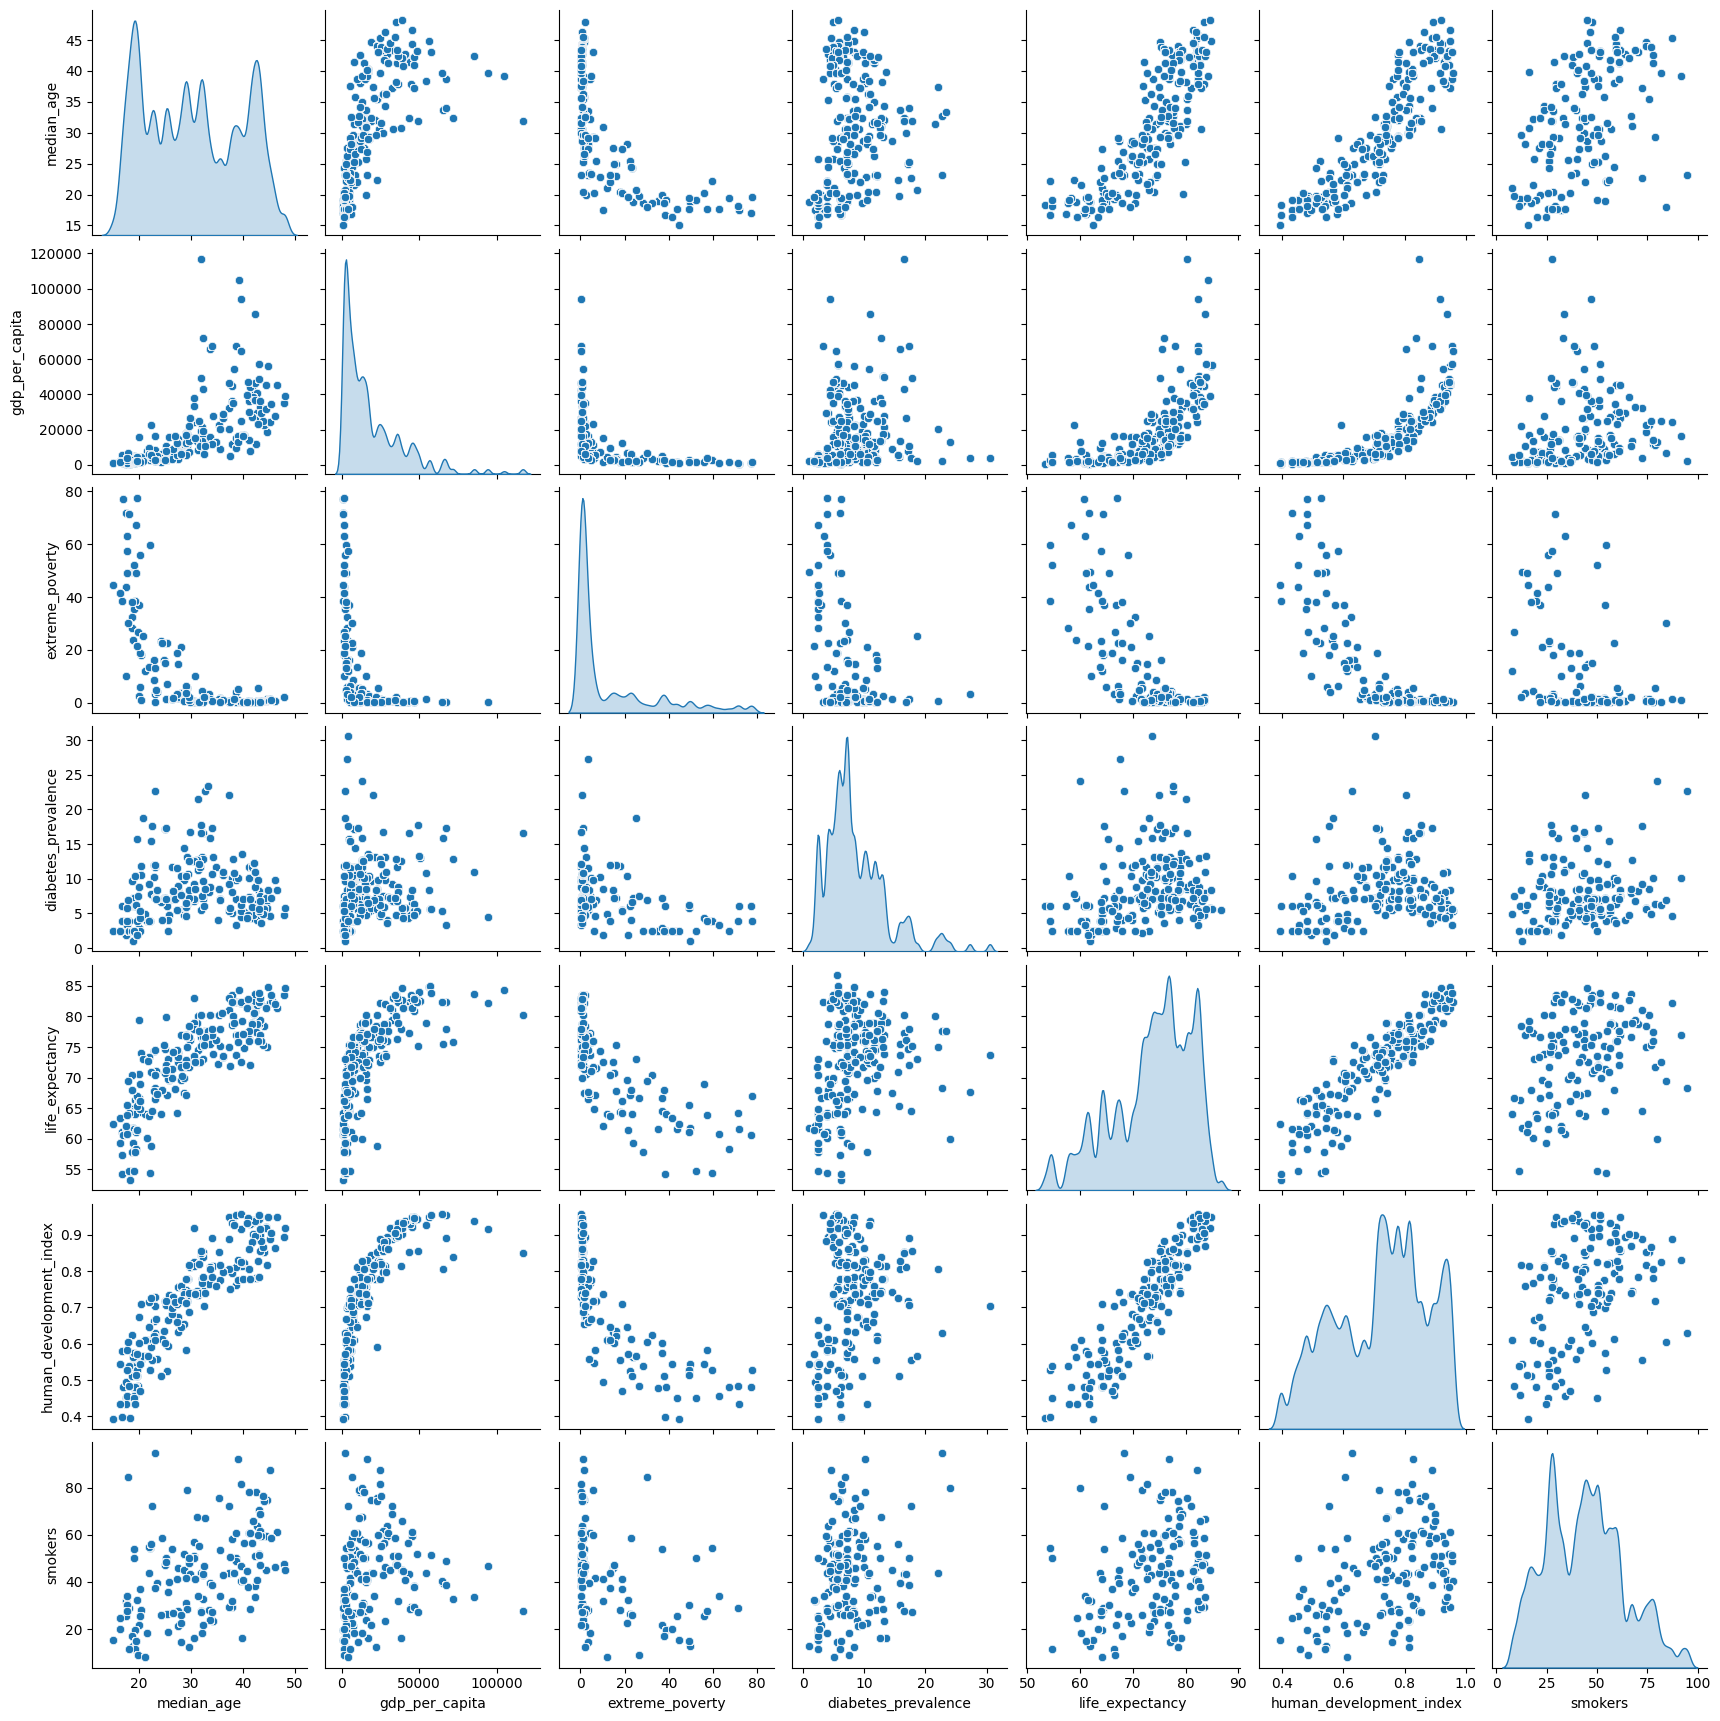

In [17]:
pairplot_data = ['median_age', 'gdp_per_capita', 'extreme_poverty',
                'diabetes_prevalence', 'life_expectancy', 'human_development_index', 'smokers']

sns.pairplot(trim_covid, vars=pairplot_data, diag_kind='kde')
plt.show()

In [18]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'total_tests',
       'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'populati

In [19]:
def show_barplot_of_feature(x, y, title, x_label, y_label):
    fig, ax = plt.subplots(figsize=(12,6))

    ax = sns.barplot(x=x, y=y, palette='gnuplot2', color='blue')
    ax1 = ax.twinx()

    total = covid.shape[0]
    for i in ax.patches:
        ax.text(i.get_x()+0.04, i.get_height(), \
                '{:,d}'.format(int(i.get_height())), fontsize=12.5, weight='bold',
                color='red')

    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=13, fontweight='bold')
    ax.set_xlabel(x_label, fontsize=13, fontweight='bold')
    ax.set_ylabel(y_label, fontsize=13, fontweight='bold')
    plt.show()

In [20]:
trim_covid['continent']

0           Asia
1           Asia
2           Asia
3           Asia
4           Asia
           ...  
350080    Africa
350081    Africa
350082    Africa
350083    Africa
350084    Africa
Name: continent, Length: 340208, dtype: object

In [21]:
trim_covid['continent'].describe()

count     330468
unique         6
top       Africa
freq       78946
Name: continent, dtype: object

In [22]:
trim_covid['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [23]:
continent_data = trim_covid.groupby('continent').sum().drop(['iso_code', 'location', 'date'], axis=1)
continent_data.head()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
continent                                                                    
Africa         1.083214e+10   13115393.0        1.311522e+07  2.323232e+08   
Asia           1.454680e+11  120317308.0        1.273673e+08  1.142203e+09   
Europe         1.545444e+11  119354486.0        1.962568e+08  1.626856e+09   
North America  6.008122e+10   28627292.0        3.746034e+07  9.517191e+08   
Oceania        7.083640e+09    4631498.0        1.308980e+07  1.425608e+07   

               new_deaths  new_deaths_smoothed  total_cases_per_million  \
continent                                                                 
Africa           259034.0           259034.498             1.762526e+09   
Asia             973930.0           996631.885             4.355770e+09   
Europe          1373890.0          1800554.619             1.333111e+10   
North America    538752.0           615174.073             6.129507e+09   
Oceania           28301.0            28068.560             2.728566e+09   

               new_cases_per_million  new_cases_smoothed_per_million  \
continent                                                              
Africa                  2.650074e+06                    2.650063e+06   
Asia                    5.963245e+06                    6.057378e+06   
Europe                  1.756469e+07                    1.939538e+07   
North America           9.207706e+06                    9.233269e+06   
Oceania                 5.217531e+06                    5.540448e+06   

               total_deaths_per_million  new_deaths_per_million  \
continent                                                         
Africa                     1.538512e+07               18075.236   
Asia                       2.620350e+07               30589.178   
Europe                     1.090001e+08              120422.582   
North America              4.641325e+07               58850.360   
Oceania                    8.462641e+06               12856.470   

               new_deaths_smoothed_per_million  reproduction_rate  \
continent                                                           
Africa                               18072.967           41237.32   
Asia                                 30789.613           42418.05   
Europe                              129465.312           46062.63   
North America                        59062.546           18394.49   
Oceania                              12847.579            4381.53   

                total_tests     new_tests  total_tests_per_thousand  \
continent                                                             
Africa         2.221336e+10  6.153282e+07              8.947990e+05   
Asia           3.657383e+11  1.011967e+09              1.581678e+07   
Europe         4.727789e+11  1.423467e+09              4.546800e+07   
North America  9.580739e+10  1.933097e+08              3.252548e+06   
Oceania        2.242453e+10  7.567205e+07              2.208502e+06   

               new_tests_per_thousand  new_tests_smoothed  \
continent                                                   
Africa                       2946.482        9.096322e+07   
Asia                        58862.208        1.026009e+10   
Europe                     146930.006        1.768671e+09   
North America                9365.903        2.165530e+08   
Oceania                      7156.993        7.829809e+07   

               new_tests_smoothed_per_thousand  positive_rate  tests_per_case  \
continent                                                                       
Africa                                5559.793      1393.3409       2064272.6   
Asia                                 77210.628      1856.1660     220714255.1   
Europe                              165579.736      3085.5092       1864309.3   
North America                        14872.013      1552.9634        329530.4   
Oceania                               8626.400       178.0207       1606

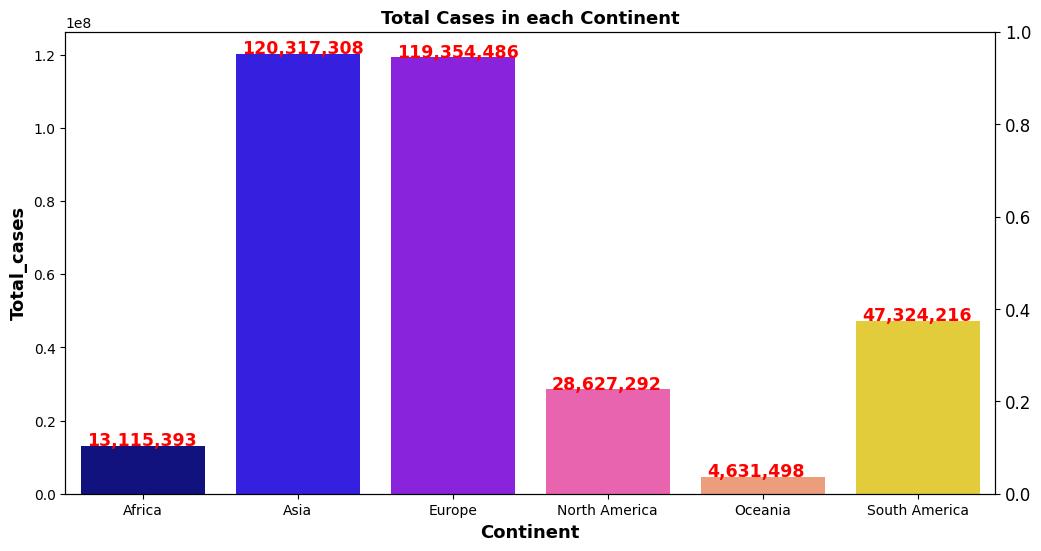

In [24]:
show_barplot_of_feature(continent_data.index, continent_data['new_cases'], 'Total Cases in each Continent', 'Continent', 'Total_cases')

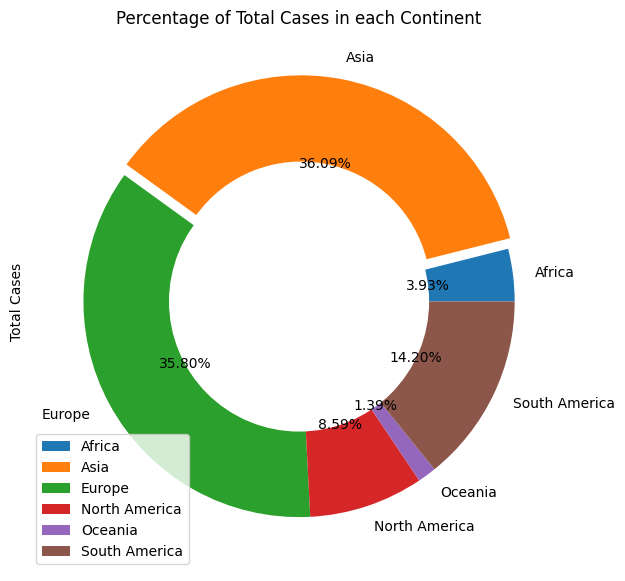

In [25]:
continent_data.plot(kind='pie', y='new_cases', figsize=(10, 7), autopct='%1.2f%%', explode=[0, 0.05, 0, 0, 0, 0], wedgeprops=dict(width=0.4))
plt.title('Percentage of Total Cases in each Continent')
plt.ylabel('Total Cases')
center_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.show()

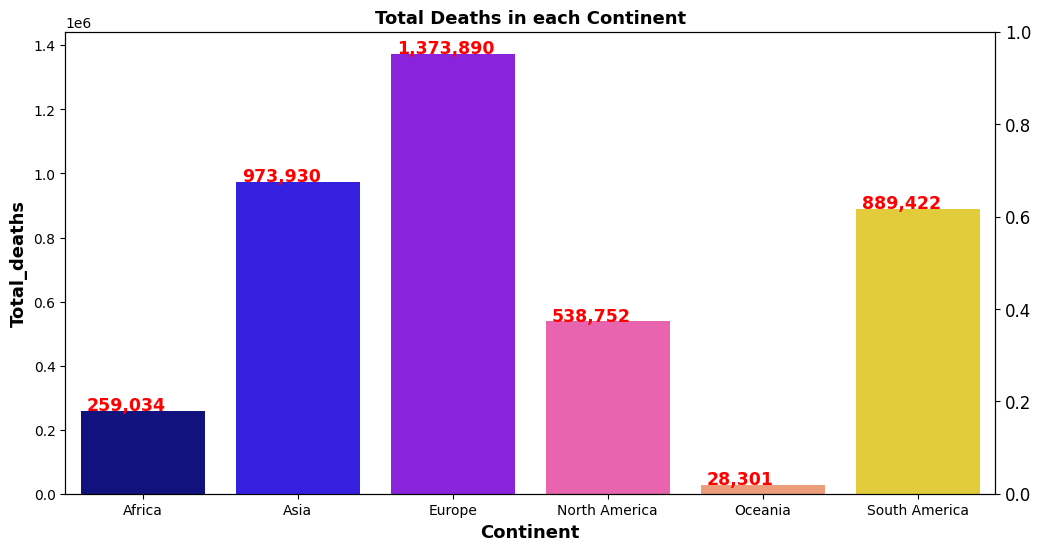

In [26]:
show_barplot_of_feature(continent_data.index, continent_data['new_deaths'], 'Total Deaths in each Continent', 'Continent', 'Total_deaths')

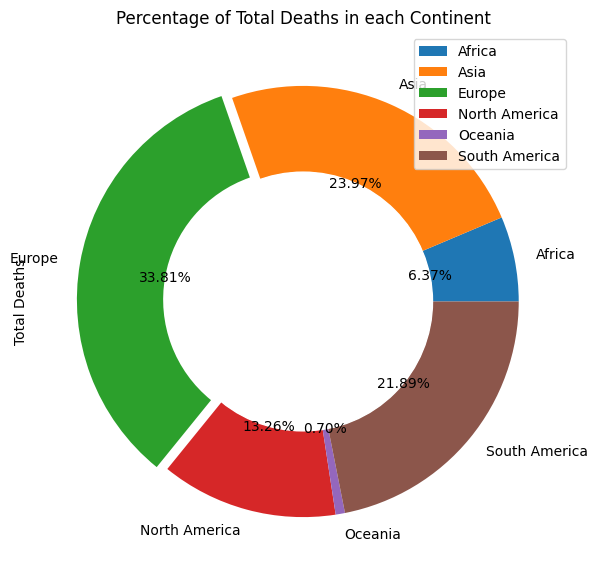

In [27]:
continent_data.plot(kind='pie', y='new_deaths', figsize=(10, 7), autopct='%1.2f%%', explode=[0, 0, 0.05, 0, 0, 0], wedgeprops=dict(width=0.4))
plt.title('Percentage of Total Deaths in each Continent')
plt.ylabel('Total Deaths')
center_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.show()

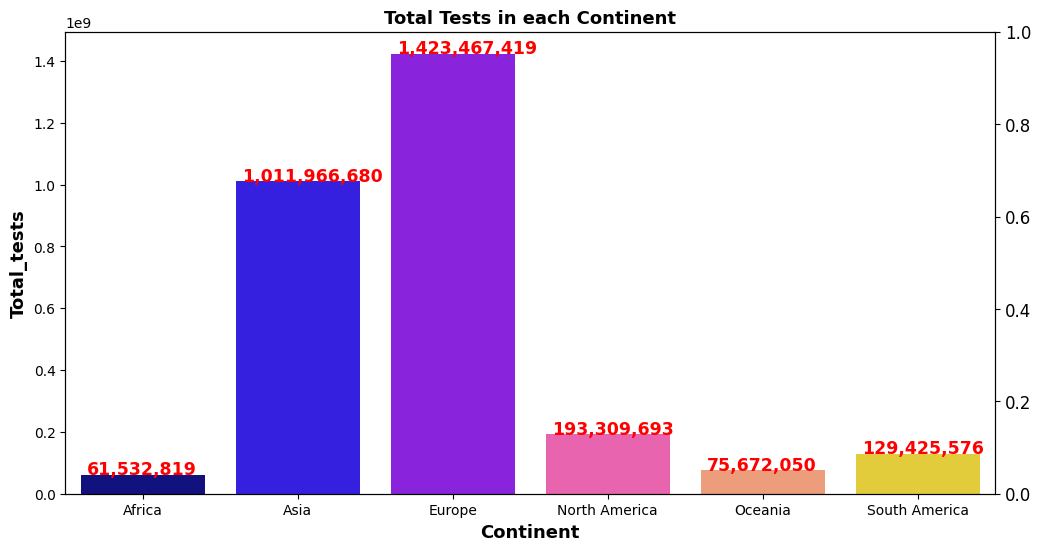

In [28]:
show_barplot_of_feature(continent_data.index, continent_data['new_tests'], 'Total Tests in each Continent', 'Continent', 'Total_tests')

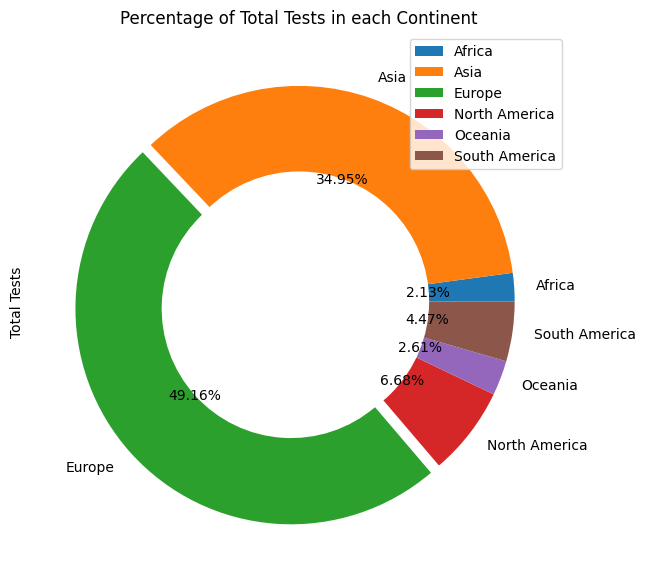

In [29]:
continent_data.plot(kind='pie', y='new_tests', figsize=(10, 7), autopct='%1.2f%%', explode=[0, 0, 0.05, 0, 0, 0], wedgeprops=dict(width=0.4))
plt.title('Percentage of Total Tests in each Continent')
plt.ylabel('Total Tests')
center_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.show()

In [30]:
continents = []
means_of_density = []
for continent in covid['continent'].unique():
    if continent is not np.nan:
        continents.append(continent)
        means_of_density.append(covid[covid['continent'] == continent]['population_density'].mean())

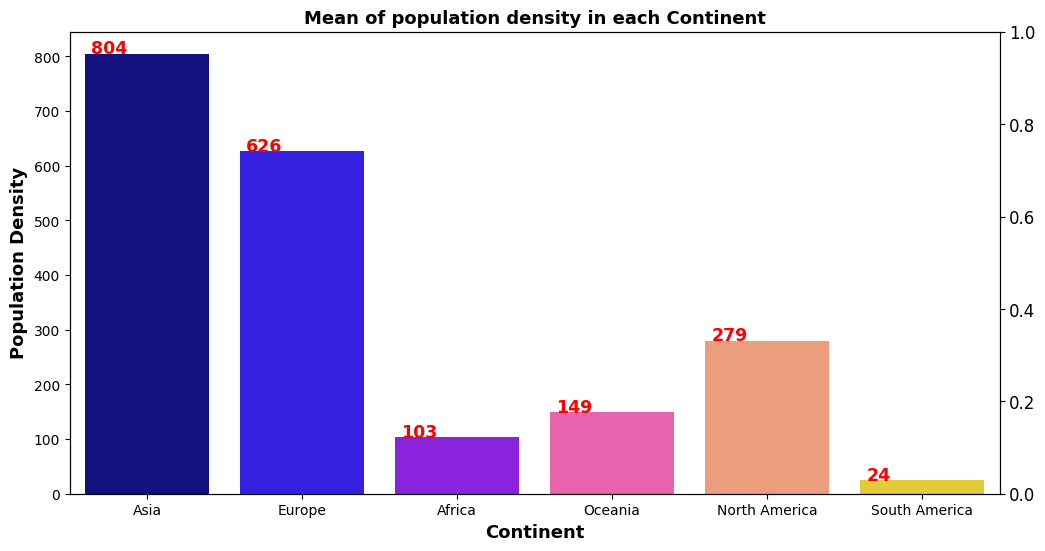

In [31]:
show_barplot_of_feature(continents, means_of_density, 'Mean of population density in each Continent', 'Continent', 'Population Density')

In [32]:
some_country_data = covid[covid['location'].isin(['Iran', 'United States', 'France', 'Germany', 'Switzerland'])]
some_country_data['date'] = pd.to_datetime(some_country_data['date'], errors='coerce')
some_country_data['Year'] = some_country_data['date'].dt.year

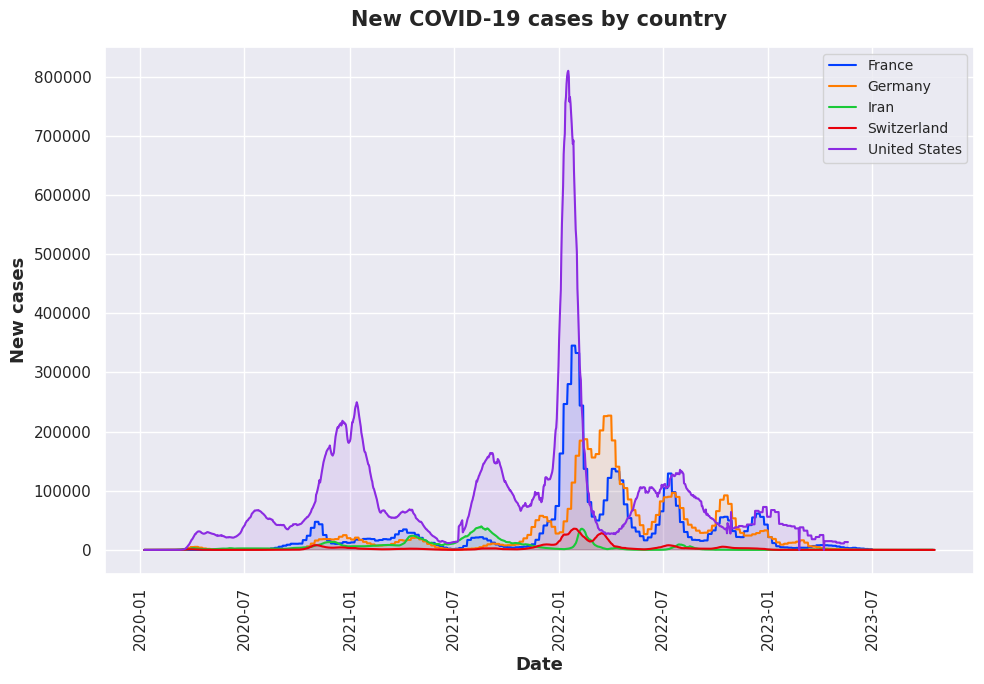

In [33]:
plt.figure(figsize=(10, 7))

sns.set(style='darkgrid')
colors = sns.color_palette("bright")
sns.lineplot(x='date', y='new_cases_smoothed', hue='location', data=some_country_data.reset_index(), palette=colors)
plt.fill_between(x='date', y1='new_cases_smoothed', data=some_country_data.reset_index(), alpha=0.1, color=colors)
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('New cases', fontsize=13, fontweight='bold')
plt.title('New COVID-19 cases by country', fontsize=15, pad=15, fontweight='bold')
plt.xticks(rotation=90)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

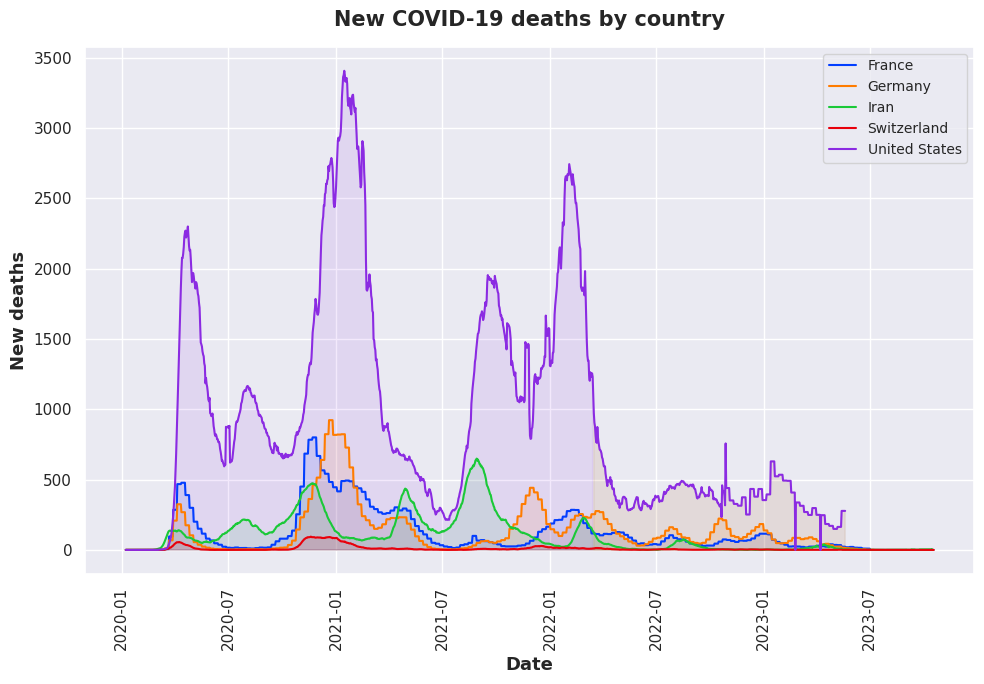

In [34]:
plt.figure(figsize=(10, 7))

sns.set(style='darkgrid')
colors = sns.color_palette("bright")
sns.lineplot(x='date', y='new_deaths_smoothed', hue='location', data=some_country_data.reset_index(), palette=colors)
plt.fill_between(x='date', y1='new_deaths_smoothed', data=some_country_data.reset_index(), alpha=0.1, color=colors)
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('New deaths', fontsize=13, fontweight='bold')
plt.title('New COVID-19 deaths by country', fontsize=15, pad=15, fontweight='bold')
plt.xticks(rotation=90)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [35]:
some_country_data = trim_covid[trim_covid['location'].isin(['Iran', 'United States', 'France', 'Germany', 'Switzerland'])]
some_country_group = some_country_data[["location","cardiovasc_death_rate","diabetes_prevalence","life_expectancy","human_development_index", "gdp_per_capita", "stringency_index"]].groupby('location').mean()
some_country_group

cardiovasc_death_rate  diabetes_prevalence  life_expectancy  \
location                                                                     
France                        86.060                 4.77            82.66   
Germany                      156.139                 8.31            81.33   
Iran                         270.308                 9.59            76.68   
Switzerland                   99.739                 5.59            83.78   
United States                151.089                10.79            78.86   

               human_development_index  gdp_per_capita  stringency_index  
location                                                                  
France                           0.901       38605.671         42.184031  
Germany                          0.947       45229.245         44.511329  
Iran                             0.783       19082.620         59.445210  
Switzerland                      0.955       57410.166         36.424525  
United States                    0.926       54225.446         36.733333

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
some_country_group = pd.DataFrame(scaler.fit_transform(some_country_group), index=some_country_group.index, columns=some_country_group.columns)
for col in some_country_group.columns:
    some_country_group[col] += 1

some_country_group

cardiovasc_death_rate  diabetes_prevalence  life_expectancy  \
location                                                                     
France                      1.000000             1.000000         1.842254   
Germany                     1.380351             1.588040         1.654930   
Iran                        2.000000             1.800664         1.000000   
Switzerland                 1.074242             1.136213         2.000000   
United States               1.352943             2.000000         1.307042   

               human_development_index  gdp_per_capita  stringency_index  
location                                                                  
France                        1.686047        1.509374          1.250188  
Germany                       1.953488        1.682189          1.351284  
Iran                          1.000000        1.000000          2.000000  
Switzerland                   2.000000        2.000000          1.000000  
United States                 1.831395        1.916908          1.013414

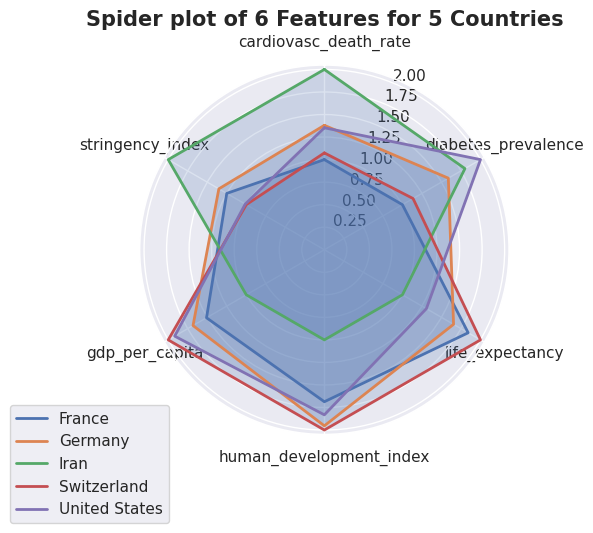

In [37]:
from math import pi

categories = ["cardiovasc_death_rate","diabetes_prevalence","life_expectancy","human_development_index", "gdp_per_capita", "stringency_index"]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 

values = some_country_group.iloc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="France")
ax.fill(angles, values, 'b', alpha=0.2)
 
values = some_country_group.iloc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="Germany")
ax.fill(angles, values, 'b', alpha=0.2)

values = some_country_group.iloc[2].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="Iran")
ax.fill(angles, values, 'b', alpha=0.2)

values = some_country_group.iloc[3].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="Switzerland")
ax.fill(angles, values, 'b', alpha=0.2)

values = some_country_group.iloc[4].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="United States")
ax.fill(angles, values, 'b', alpha=0.2)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Spider plot of 6 Features for 5 Countries', fontsize=15, fontweight='bold')
plt.show()

In [38]:
some_country_data = covid[covid['location'].isin(['Iran', 'United States', 'France', 'Germany', 'Switzerland'])]
some_country_data['date'] = pd.to_datetime(some_country_data['date'], errors='coerce')
some_country_data['Year'] = some_country_data['date'].dt.year
some_country_data = some_country_data[some_country_data['Year'] < 2023]

In [39]:
some_country_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'total_tests',
       'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'populati

In [40]:
some_country_data_temp = some_country_data[['location', 'new_cases', 'life_expectancy', 'gdp_per_capita', 'human_development_index', 'extreme_poverty', 'Year']]
some_country_data_temp.head()

location  new_cases  life_expectancy  gdp_per_capita  \
105215   France        0.0            82.66       38605.671   
105216   France        0.0            82.66       38605.671   
105217   France        0.0            82.66       38605.671   
105218   France        0.0            82.66       38605.671   
105219   France        0.0            82.66       38605.671   

        human_development_index  extreme_poverty  Year  
105215                    0.901              NaN  2020  
105216                    0.901              NaN  2020  
105217                    0.901              NaN  2020  
105218                    0.901              NaN  2020  
105219                    0.901              NaN  2020

In [41]:
year_country = some_country_data_temp.groupby(['Year', 'location']).sum()
year_country

new_cases  life_expectancy  gdp_per_capita  \
Year location                                                     
2020 France          2338258.0         30088.24    1.405246e+07   
     Germany         1660178.0         29604.12    1.646345e+07   
     Iran            1218753.0         27911.52    6.946074e+06   
     Switzerland      451142.0         30495.92    2.089730e+07   
     United States  19577585.0         28705.04    1.973806e+07   
2021 France          6371668.0         30170.90    1.409107e+07   
     Germany         5353865.0         29685.45    1.650867e+07   
     Iran            4973945.0         27988.20    6.965156e+06   
     Switzerland      883690.0         30579.70    2.095471e+07   
     United States  33956701.0         28783.90    1.979229e+07   
2022 France         29279621.0         30170.90    1.409107e+07   
     Germany        30227893.0         29685.45    1.650867e+07   
     Iran            1368360.0         27988.20    6.965156e+06   
     Switzerland     3045631.0         30579.70    2.095471e+07   
     United States  45877410.0         28783.90    1.979229e+07   

                    human_development_index  extreme_poverty  
Year location                                                 
2020 France                         327.964              0.0  
     Germany                        344.708              0.0  
     Iran                           285.012             72.8  
     Switzerland                    347.620              0.0  
     United States                  337.064            436.8  
2021 France                         328.865              0.0  
     Germany                        345.655              0.0  
     Iran                           285.795             73.0  
     Switzerland                    348.575              0.0  
     United States                  337.990            438.0  
2022 France                         328.865              0.0  
     Germany                        345.655              0.0  
     Iran                           285.795             73.0  
     Switzerland                    348.575              0.0  
     United States                  337.990            438.0

In [42]:
scaler = MinMaxScaler()
year_country = pd.DataFrame(scaler.fit_transform(year_country), index=year_country.index, columns=year_country.columns)
for col in year_country.columns:
    year_country[col] += 1

year_country

new_cases  life_expectancy  gdp_per_capita  \
Year location                                                    
2020 France          1.041542         1.815807        1.507286   
     Germany         1.026615         1.634365        1.679393   
     Iran            1.016898         1.000000        1.000000   
     Switzerland     1.000000         1.968600        1.995902   
     United States   1.421044         1.297401        1.913150   
2021 France          1.130333         1.846787        1.510042   
     Germany         1.107927         1.664846        1.682622   
     Iran            1.099564         1.028739        1.001362   
     Switzerland     1.009522         2.000000        2.000000   
     United States   1.737581         1.326957        1.917021   
2022 France          1.634621         1.846787        1.510042   
     Germany         1.655496         1.664846        1.682622   
     Iran            1.020191         1.028739        1.001362   
     Switzerland     1.057114         2.000000        2.000000   
     United States   2.000000         1.326957        1.917021   

                    human_development_index  extreme_poverty  
Year location                                                 
2020 France                        1.675739         1.000000  
     Germany                       1.939163         1.000000  
     Iran                          1.000000         1.166210  
     Switzerland                   1.984976         1.000000  
     United States                 1.818904         1.997260  
2021 France                        1.689914         1.000000  
     Germany                       1.954061         1.000000  
     Iran                          1.012318         1.166667  
     Switzerland                   2.000000         1.000000  
     United States                 1.833472         2.000000  
2022 France                        1.689914         1.000000  
     Germany                       1.954061         1.000000  
     Iran                          1.012318         1.166667  
     Switzerland                   2.000000         1.000000  
     United States                 1.833472         2.000000

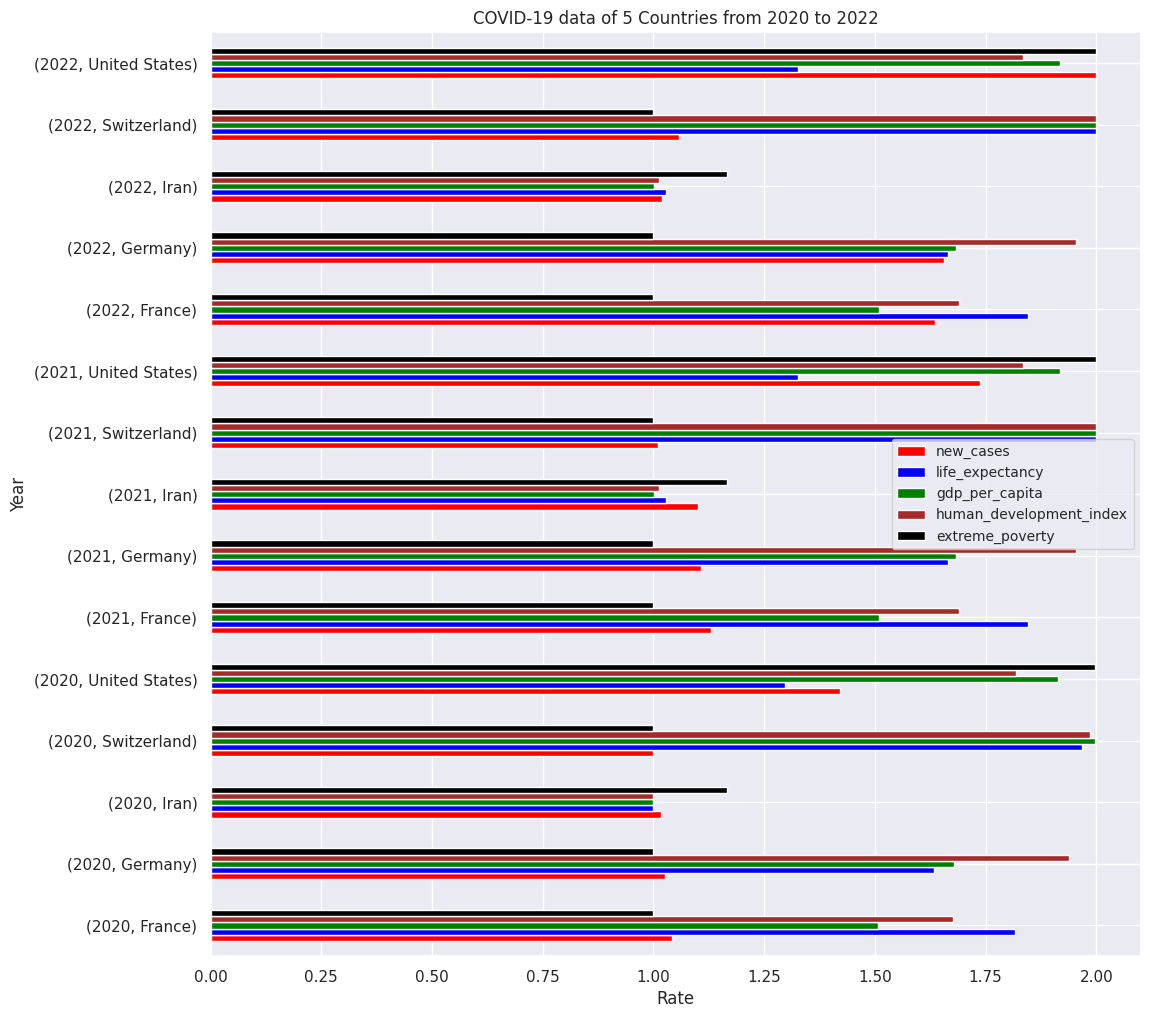

In [43]:
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots(figsize=(12, 12))
year_country.plot(ax=ax, kind='barh', xlabel='Rate', ylabel='Year', title='COVID-19 data of 5 Countries from 2020 to 2022', color=['red', 'blue', 'green', 'brown', 'black'])
plt.legend(fontsize='small')
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()

In [44]:
covid['date'] = pd.to_datetime(covid['date'], errors='coerce')
covid

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan 2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan 2020-01-05          NaN        0.0   
3           AFG      Asia  Afghanistan 2020-01-06          NaN        0.0   
4           AFG      Asia  Afghanistan 2020-01-07          NaN        0.0   
...         ...       ...          ...        ...          ...        ...   
350080      ZWE    Africa     Zimbabwe 2023-10-14     265808.0        0.0   
350081      ZWE    Africa     Zimbabwe 2023-10-15     265808.0        0.0   
350082      ZWE    Africa     Zimbabwe 2023-10-16     265808.0        0.0   
350083      ZWE    Africa     Zimbabwe 2023-10-17     265808.0        0.0   
350084      ZWE    Africa     Zimbabwe 2023-10-18     265808.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
350080               5.286        5718.0         0.0                  0.0   
350081               5.286        5718.0         0.0                  0.0   
350082               5.286        5718.0         0.0                  0.0   
350083               0.000        5718.0         0.0                  0.0   
350084               0.000        5718.0         0.0                  0.0   

        total_cases_per_million  new_cases_per_million  \
0                           NaN                    0.0   
1                           NaN                    0.0   
2                           NaN                    0.0   
3                           NaN                    0.0   
4                           NaN                    0.0   
...                         ...                    ...   
350080                16286.717                    0.0   
350081                16286.717                    0.0   
350082                16286.717                    0.0   
350083                16286.717                    0.0   
350084                16286.717                    0.0   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
350080                           0.324                   350.356   
350081                           0.324                   350.356   
350082                           0.324                   350.356   
350083                           0.000                   350.356   
350084                           0.000                   350.356   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          0.0                              NaN   
1                          0.0                              NaN   
2                          0.0                              NaN   
3                          0.0                              NaN   
4                          0.0                              NaN   
...                        ...                              ...   
350080                     0.0                              0.0   
350081                     0.0                              0.0   
350082                     0.0          

In [45]:
covid_copy = covid.copy().set_index('date')
index = ['continent',
         'total_cases_per_million', 
         'total_deaths_per_million']

covid_data_continent = covid_copy[index].reset_index().groupby(['date', 'continent'], as_index=False).mean().set_index('date')

In [46]:
covid_data_continent

continent  total_cases_per_million  total_deaths_per_million
date                                                                        
2020-01-01  North America                      NaN                       NaN
2020-01-01  South America                      NaN                       NaN
2020-01-02  North America                      NaN                       NaN
2020-01-02  South America                      NaN                       NaN
2020-01-03         Africa                      NaN                       NaN
...                   ...                      ...                       ...
2023-10-23           Asia                      NaN                       NaN
2023-10-23         Europe                      NaN                       NaN
2023-10-23  North America                      NaN                       NaN
2023-10-23  South America                      NaN                       NaN
2023-10-24         Europe                      NaN                       NaN

[8336 rows x 3 columns]

In [47]:
import plotly.express as px

fig = px.line(covid_data_continent.reset_index(), x='date', y='total_cases_per_million', color='continent', line_group='continent', hover_name='continent')
fig.update_layout(
    title='Total COVID-19 cases per million by continent',
    xaxis_title='Date',
    yaxis_title='Total cases per million',
    legend_title='Continent',
    font=dict(
        family='Arial',
        size=15,
        color='black',
    ),
)
fig.update_xaxes(tickangle=90)
fig.show()

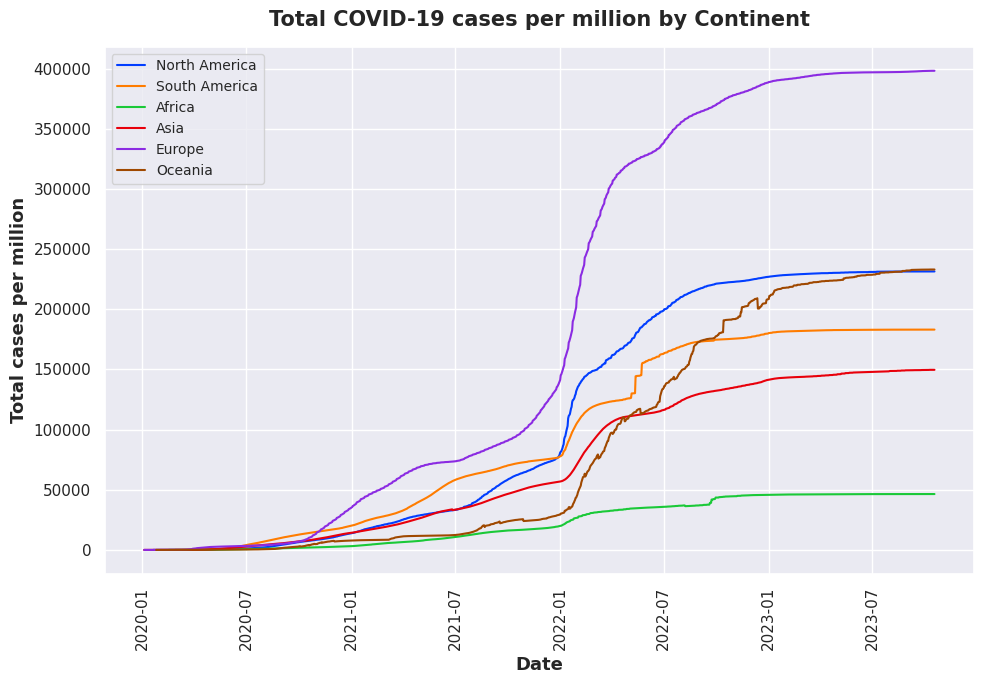

In [48]:
plt.figure(figsize=(10, 7))

sns.set(style='darkgrid')
colors = sns.color_palette("bright")
sns.lineplot(x='date', y='total_cases_per_million', hue='continent', data=covid_data_continent.reset_index(), palette=colors)
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Total cases per million', fontsize=13, fontweight='bold')
plt.title('Total COVID-19 cases per million by Continent', fontsize=15, pad=15, fontweight='bold')
plt.xticks(rotation=90)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [49]:
import plotly.express as px

fig = px.line(covid_data_continent.reset_index(), x='date', y='total_deaths_per_million', color='continent', line_group='continent', hover_name='continent')
fig.update_layout(
    title='Total COVID-19 deaths per million by continent',
    xaxis_title='Date',
    yaxis_title='Total deaths per million',
    legend_title='Continent',
    font=dict(
        family='Arial',
        size=15,
        color='black',
    ),
)
fig.update_xaxes(tickangle=90)
fig.show()

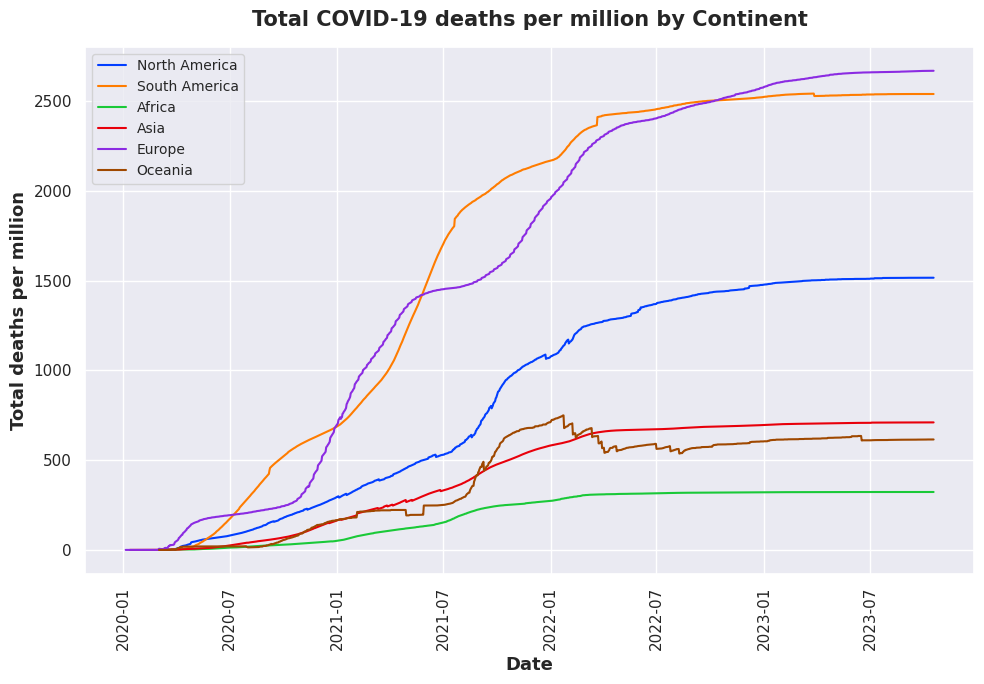

In [50]:
plt.figure(figsize=(10, 7))

sns.set(style='darkgrid')
colors = sns.color_palette("bright")
sns.lineplot(x='date', y='total_deaths_per_million', hue='continent', data=covid_data_continent.reset_index(), palette=colors)
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Total deaths per million', fontsize=13, fontweight='bold')
plt.title('Total COVID-19 deaths per million by Continent', fontsize=15, pad=15, fontweight='bold')
plt.xticks(rotation=90)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [51]:
some_country_data = covid[covid['location'].isin(['Iran', 'United States', 'France', 'Germany', 'Switzerland'])]
covid_copy = some_country_data.copy().set_index('date')
index = ['location',
         'total_cases_per_million', 
         'total_deaths_per_million']

covid_data_continent = covid_copy[index].reset_index().groupby(['date', 'location'], as_index=False).mean().set_index('date')

In [52]:
import plotly.express as px

fig = px.line(covid_data_continent.reset_index(), x='date', y='total_cases_per_million', color='location', line_group='location', hover_name='location')
fig.update_layout(
    title='Total COVID-19 cases per million by 5 Countries',
    xaxis_title='Date',
    yaxis_title='Total cases per million',
    legend_title='Continent',
    font=dict(
        family='Arial',
        size=15,
        color='black',
    ),
)
fig.update_xaxes(tickangle=90)
fig.show()

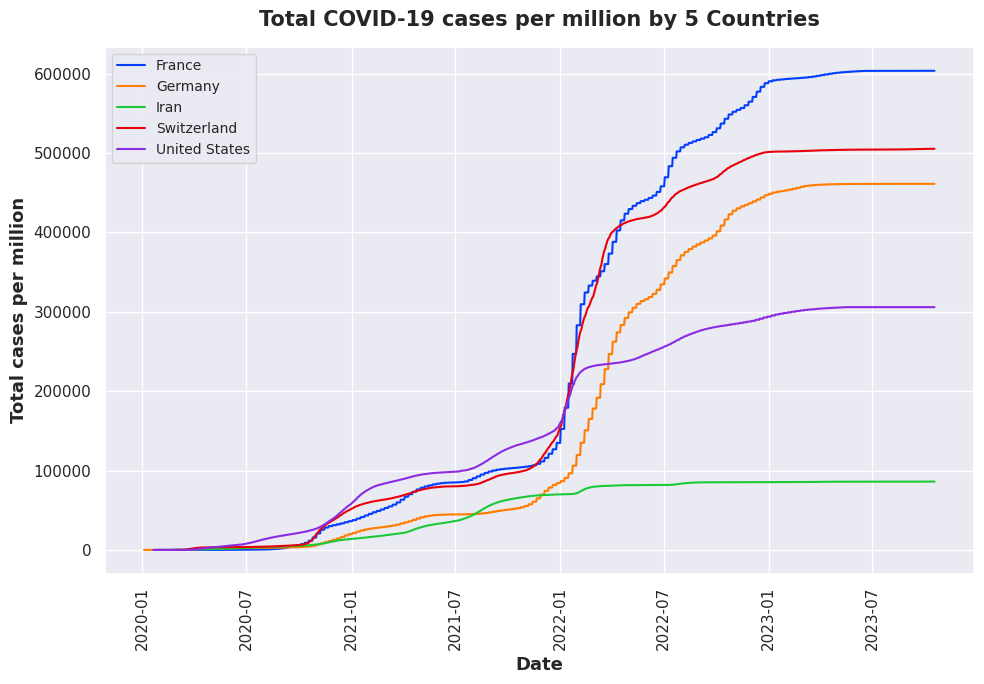

In [53]:
plt.figure(figsize=(10, 7))

sns.set(style='darkgrid')
colors = sns.color_palette("bright")
sns.lineplot(x='date', y='total_cases_per_million', hue='location', data=covid_data_continent.reset_index(), palette=colors)
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Total cases per million', fontsize=13, fontweight='bold')
plt.title('Total COVID-19 cases per million by 5 Countries', fontsize=15, pad=15, fontweight='bold')
plt.xticks(rotation=90)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [54]:
import plotly.express as px

fig = px.line(covid_data_continent.reset_index(), x='date', y='total_deaths_per_million', color='location', line_group='location', hover_name='location')
fig.update_layout(
    title='Total COVID-19 deaths per million by 5 Countries',
    xaxis_title='Date',
    yaxis_title='Total deaths per million',
    legend_title='Continent',
    font=dict(
        family='Arial',
        size=15,
        color='black',
    ),
)
fig.update_xaxes(tickangle=90)
fig.show()

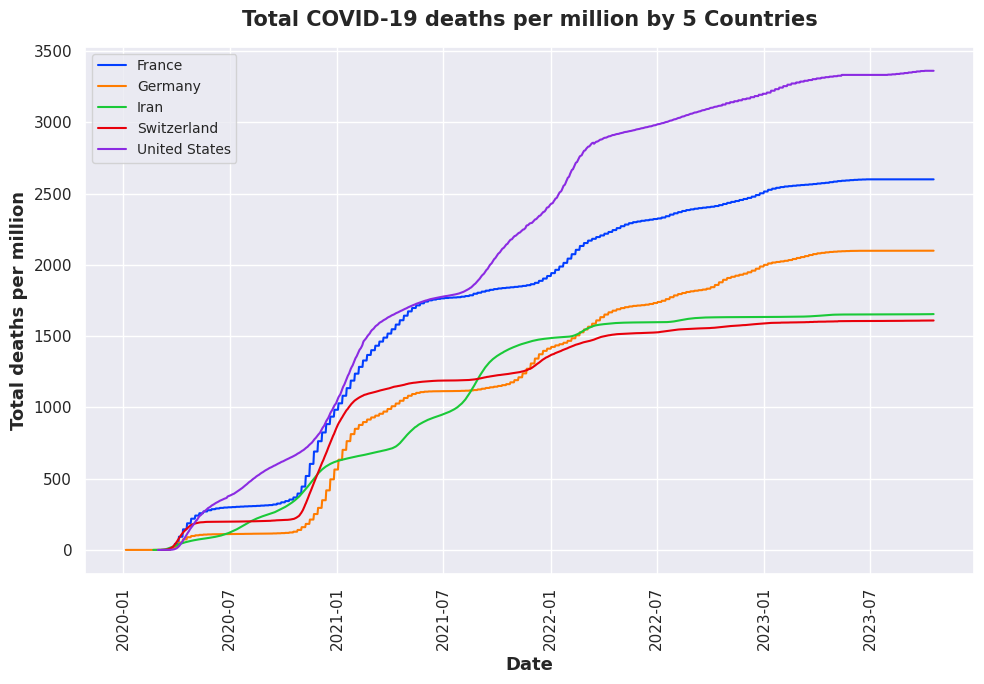

In [55]:
plt.figure(figsize=(10, 7))

sns.set(style='darkgrid')
colors = sns.color_palette("bright")
sns.lineplot(x='date', y='total_deaths_per_million', hue='location', data=covid_data_continent.reset_index(), palette=colors)
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Total deaths per million', fontsize=13, fontweight='bold')
plt.title('Total COVID-19 deaths per million by 5 Countries', fontsize=15, pad=15, fontweight='bold')
plt.xticks(rotation=90)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [56]:
final = covid[covid['date'] == '2023-3-16']

In [57]:
final_map = final.groupby('location')[["total_deaths","total_cases","population","extreme_poverty","cardiovasc_death_rate","diabetes_prevalence","handwashing_facilities","life_expectancy","human_development_index"]].sum().reset_index()
final_map.head()

location  total_deaths  total_cases    population  extreme_poverty  \
0     Afghanistan        7881.0     209648.0  4.112877e+07              0.0   
1          Africa      258787.0   13064833.0  1.426737e+09              0.0   
2         Albania        3600.0     333697.0  2.842318e+06              1.1   
3         Algeria        6881.0     271539.0  4.490323e+07              0.5   
4  American Samoa          34.0       8321.0  4.429500e+04              0.0   

   cardiovasc_death_rate  diabetes_prevalence  handwashing_facilities  \
0                597.029                 9.59                  37.746   
1                  0.000                 0.00                   0.000   
2                304.195                10.08                   0.000   
3                278.364                 6.73                  83.741   
4                283.750                 0.00                   0.000   

   life_expectancy  human_development_index  
0            64.83                    0.511  
1             0.00                    0.000  
2            78.57                    0.795  
3            76.88                    0.748  
4            73.74                    0.000

In [58]:
fig = px.choropleth(final_map, locations = 'location',
                   locationmode = 'country names',
                   color = "life_expectancy",
                   range_color = [50,90])

fig.update_layout(title = "Life Expectancy Across The World")
fig.show()

In [59]:
fig = px.choropleth(final_map, locations = 'location',
                   locationmode = 'country names',
                   color = "total_deaths",
                   range_color = [1, 100000])
fig.update_layout(title = "Death Records Across The World")
fig.show()

In [60]:
fig = px.choropleth(final_map, locations = 'location',
                   locationmode = 'country names',
                   color = "total_cases",
                   range_color = [1, 10000000])
fig.update_layout(title = "Total Cases Across The World")
fig.show()

In [61]:
fig = px.choropleth(final_map, locations = 'location',
                   locationmode = 'country names',
                   color = "extreme_poverty",
                   range_color = [1, 80])
fig.update_layout(title = "Extreme Poverty Across The World")
fig.show()

In [62]:
fig = px.choropleth(final_map, locations = 'location',
                   locationmode = 'country names',
                   color = "diabetes_prevalence",
                   range_color = [1, 15])
fig.update_layout(title = "Diabetes Prevalence Across The World")
fig.show()

In [64]:
fig = px.choropleth(final_map, locations = 'location',
                   locationmode = 'country names',
                   color = "cardiovasc_death_rate",
                   range_color = [1, 500])
fig.update_layout(title = "Cardiovasc Death Rate Across The World")
fig.show()